## Excercise 10 - Kmeans for clustering

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np

In /home/nikos/anaconda3/envs/tsa_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nikos/anaconda3/envs/tsa_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nikos/anaconda3/envs/tsa_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
olivetti = fetch_olivetti_faces()

In [3]:
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

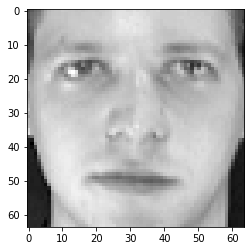

In [4]:
some_image = olivetti.images[0]
plt.imshow(some_image, cmap='gray')

In [5]:
X = olivetti.data
y = olivetti.target

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)

for train_val_index, test_index in split.split(X, y):

    X_train_val, X_test = X[train_val_index], X[test_index]
    y_train_val, y_test = y[train_val_index], y[test_index]


In [7]:
train_val_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, val_index in train_val_split.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val[train_index], X_train_val[val_index]
    y_train, y_val = y_train_val[train_index], y_train_val[val_index]

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=40)

kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.inertia_

8402.137863726864

In [10]:
# y_pred == kmeans.labels_
y_pred = kmeans.predict(X_train)

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(X_train)

(-22.89503231048584,
 24.340199851989745,
 -21.872803497314454,
 25.09415512084961)

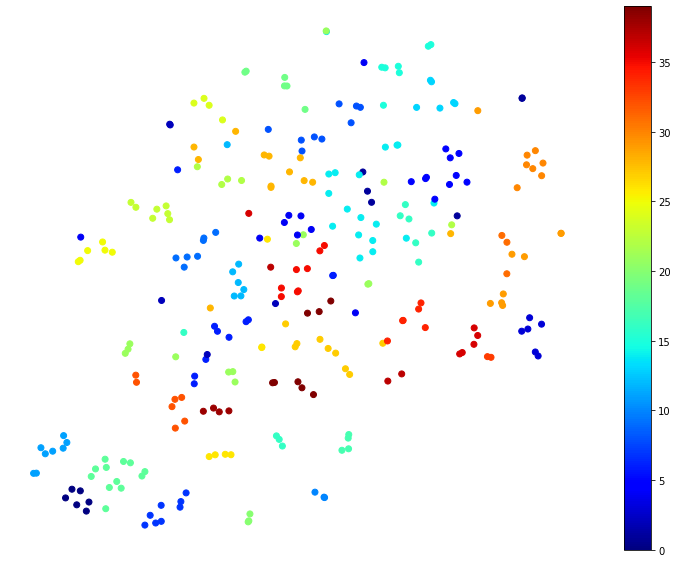

In [12]:
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='jet')
plt.colorbar()
plt.axis('off')

In [13]:
k_values = (40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150)
inertia_values = []
models = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)
    models.append(kmeans)


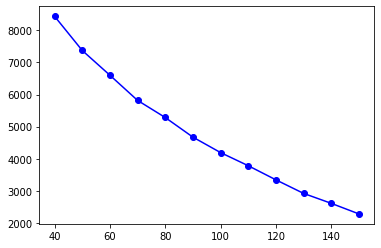

In [14]:
plt.plot(k_values, inertia_values, "bo-")

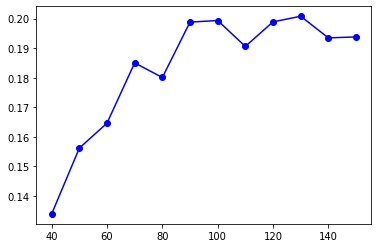

In [15]:
from sklearn.metrics import silhouette_score

silhouette_values = []
for model in models:
    score = silhouette_score(X_train, model.labels_)
    silhouette_values.append(score)

plt.plot(k_values, silhouette_values, "bo-")

(-22.89503231048584,
 24.340199851989745,
 -21.872803497314454,
 25.09415512084961)

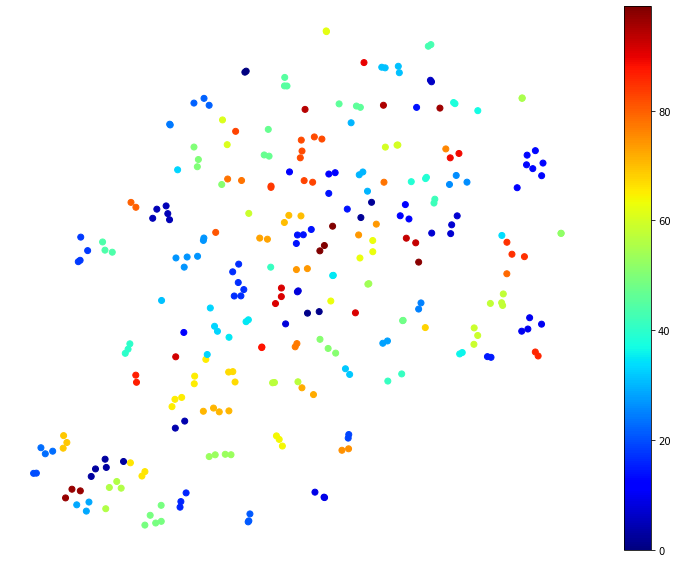

In [16]:
best_model = models[6]
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=best_model.labels_, cmap='jet')
plt.colorbar()
plt.axis('off')

### Visualize the clusters: Copied and pasted from official solution

Cluster 0


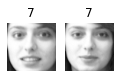

Cluster 1


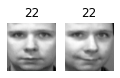

Cluster 2


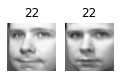

Cluster 3


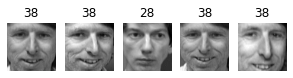

Cluster 4


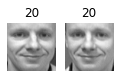

Cluster 5


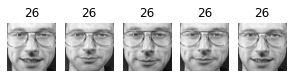

Cluster 6


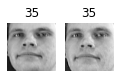

Cluster 7


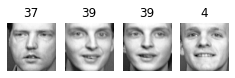

Cluster 8


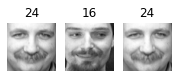

Cluster 9


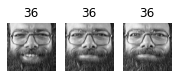

Cluster 10


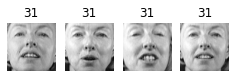

Cluster 11


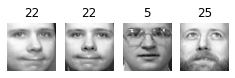

Cluster 12


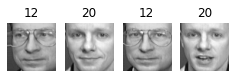

Cluster 13


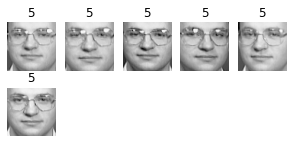

Cluster 14


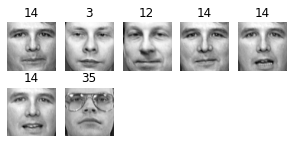

Cluster 15


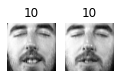

Cluster 16


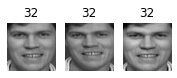

Cluster 17


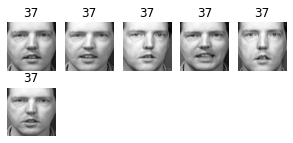

Cluster 18


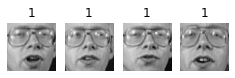

Cluster 19


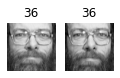

Cluster 20


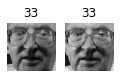

Cluster 21


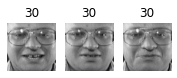

Cluster 22


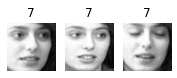

Cluster 23


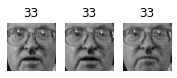

Cluster 24


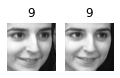

Cluster 25


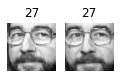

Cluster 26


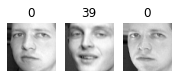

Cluster 27


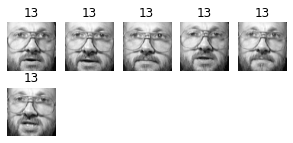

Cluster 28


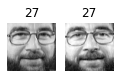

Cluster 29


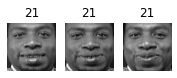

Cluster 30


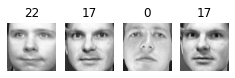

Cluster 31


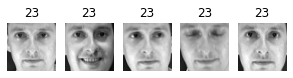

Cluster 32


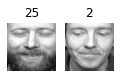

Cluster 33


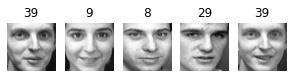

Cluster 34


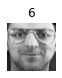

Cluster 35


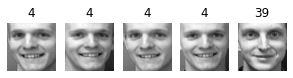

Cluster 36


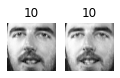

Cluster 37


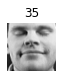

Cluster 38


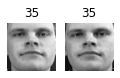

Cluster 39


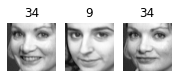

Cluster 40


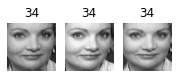

Cluster 41


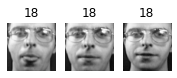

Cluster 42


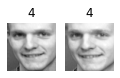

Cluster 43


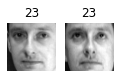

Cluster 44


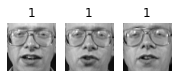

Cluster 45


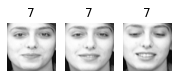

Cluster 46


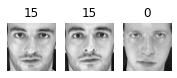

Cluster 47


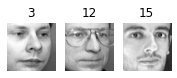

Cluster 48


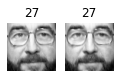

Cluster 49


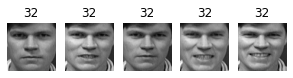

Cluster 50


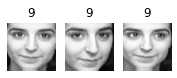

Cluster 51


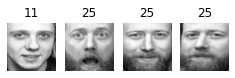

Cluster 52


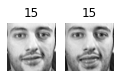

Cluster 53


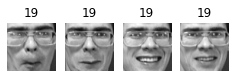

Cluster 54


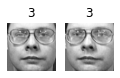

Cluster 55


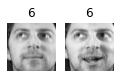

Cluster 56


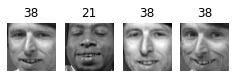

Cluster 57


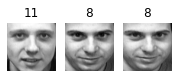

Cluster 58


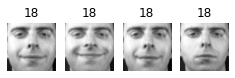

Cluster 59


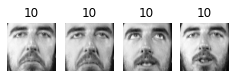

Cluster 60


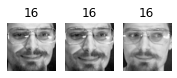

Cluster 61


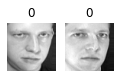

Cluster 62


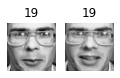

Cluster 63


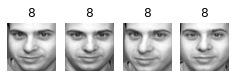

Cluster 64


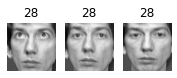

Cluster 65


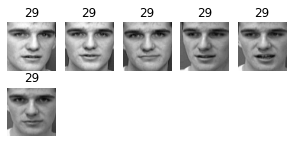

Cluster 66


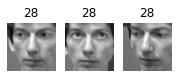

Cluster 67


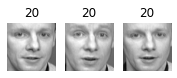

Cluster 68


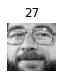

Cluster 69


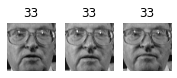

Cluster 70


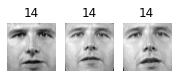

Cluster 71


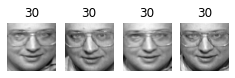

Cluster 72


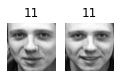

Cluster 73


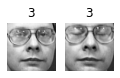

Cluster 74


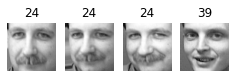

Cluster 75


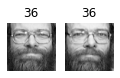

Cluster 76


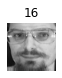

Cluster 77


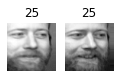

Cluster 78


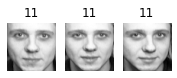

Cluster 79


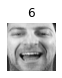

Cluster 80


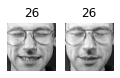

Cluster 81


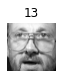

Cluster 82


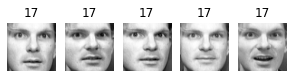

Cluster 83


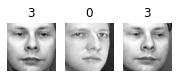

Cluster 84


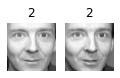

Cluster 85


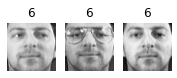

Cluster 86


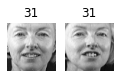

Cluster 87


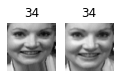

Cluster 88


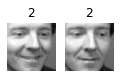

Cluster 89


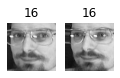

Cluster 90


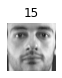

Cluster 91


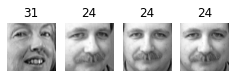

Cluster 92


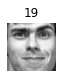

Cluster 93


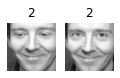

Cluster 94


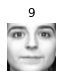

Cluster 95


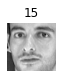

Cluster 96


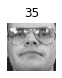

Cluster 97


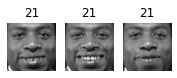

Cluster 98


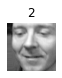

Cluster 99


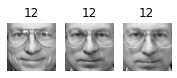

In [17]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## Excercise 11

In [18]:
from sklearn.svm import LinearSVC

svc = LinearSVC(dual=False)

svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [19]:
svc.score(X_val, y_val)

1.0

## Use K-means as a dimensionality reduction tool

In [23]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=40)),
    ("svc", LinearSVC(dual=False))
])


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {"kmeans__n_clusters": range(40, 150, 10)}
grid = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   37.9s finished
/home/nikos/anaconda3/envs/tsa_course/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)), ('svc', LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kmeans__n_clusters': range(40, 150, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [25]:
grid.best_params_

{'kmeans__n_clusters': 90}

In [26]:
grid.score(X_val, y_val)

0.9583333333333334

## Excercise 12 - Gaussian Mixture model - anomaly detection

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)

In [29]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, n_init=10)

gm.fit(X_train_reduced)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=40, n_init=10, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [30]:
gm.converged_

True

In [31]:
gm.n_iter_

2

In [36]:
X_new_reduced, y_new = gm.sample(n_samples=10)

In [38]:
X_new_inv = pca.inverse_transform(X_new_reduced)

In [41]:
new_faces = X_new_inv.reshape(-1, 64, 64)

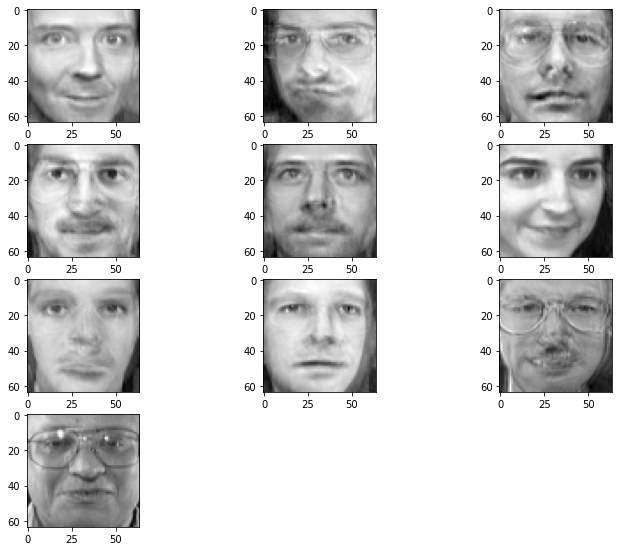

In [48]:
plt.figure(figsize=(12, 12))
for index, face in enumerate(new_faces):
    plt.subplot(5, 3, index+1)
    plt.imshow(face, cmap='gray')

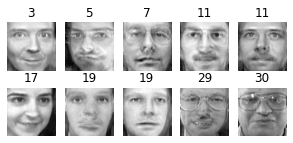

In [51]:
plot_faces(new_faces, y_new)

In [50]:
gm.score_samples(X_new_reduced)

array([1068.33470624, 1058.46021909,  984.8364934 , 1020.8437101 ,
        988.91981549, 1069.97652096, 1051.15138783, 1046.79954732,
       1066.88174409, 1104.69940918])

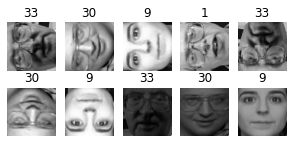

In [52]:
# Rotate, flip, darken some images: copied from official solution
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [53]:
X_bad_faces_reduced = pca.transform(X_bad_faces)

In [55]:
# The modified images are considered highly unlikely by the model
gm.score_samples(X_bad_faces_reduced)

array([-2.81191466e+07, -2.41064501e+07, -4.07763965e+07, -3.70490554e+07,
       -4.05923481e+07, -3.56710166e+07, -4.14926186e+07, -1.55031552e+08,
       -1.25245643e+08, -8.06450723e+07])

In [56]:
gm.score_samples(X_train_reduced[:10])

array([1164.53286354, 1142.83946266, 1139.5402569 , 1169.98639248,
       1171.18891225, 1148.08434774, 1154.34741114, 1169.98639347,
       1103.03268684, 1084.22383204])

## Excercise 13: PCA for anomaly detection

In [58]:
from sklearn.metrics import mean_squared_error

X_train_reconstr = pca.inverse_transform(X_train_reduced)

mean_squared_error(X_train, X_train_reconstr)

0.00019124651

In [59]:
# Reconstruction error for the anomalies is orders of magnitude larger
X_bad_faces_reconstr = pca.inverse_transform(X_bad_faces_reduced)

mean_squared_error(X_bad_faces, X_bad_faces_reconstr)

0.005165706

In [ ]:
plot_faces(X_bad_faces_reconstr.reshape(-1, 64, 64), y_bad)